#**Install Library**

In [48]:
!pip install pysal
!pip install esda

#**Import Library**

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import esda
import pysal.lib

#**Load Dataset**

In [50]:
import geopandas as gpd

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/united_states_california_administrative_boundaries_province_polygon.shp"
california_map = gpd.read_file(geojson_url)

# Perform spatial data operations
# Create a spatial weights matrix
w = pysal.lib.weights.Queen.from_dataframe(california_map, use_index=True)

california_map.head(10)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 8 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7.
  warnings.warn(message)


,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,tracktype,tunnel,water,waterway,wetland,width,wood,z_order,way_area,geometry
0,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,5.161680e+08,"POLYGON ((-119.63630 33.27304, -119.63607 33.2..."
1,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,1.548730e+08,"POLYGON ((-119.75770 33.36296, -119.75767 33.3..."
2,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,3.233270e+09,"POLYGON ((-120.58226 34.10752, -120.57905 34.1..."
3,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,1.095480e+09,"POLYGON ((-118.66796 33.48271, -118.66779 33.4..."
4,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,6.654450e+11,"POLYGON ((-124.48200 40.44032, -124.47916 40.4..."
5,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,9.645900e+08,"POLYGON ((-118.67855 33.02636, -118.67820 33.0..."
6,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,2.466080e+08,"POLYGON ((-119.12356 33.49187, -119.11981 33.4..."
7,None,None,None,None,4,None,None,None,None,None,...,None,None,None,None,None,None,None,0,3.978200e+08,"POLYGON ((-123.17383 37.77573, -123.17372 37.7..."


In [51]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1952_2022.csv"
df = pd.read_csv(dataset)
df.head(15)

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1968 - 2018
df_selected = df[(df['time'].dt.year >= 1968) & (df['time'].dt.year <= 2018)]

# Tampilkan lima baris pertama dari data terpilih
df = df_selected

# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'place','depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

In [52]:
import pandas as pd

# Mengonversi kolom 'time' ke tipe data datetime
df_selected_columns = df_selected_columns.copy()
df_selected_columns['time'] = pd.to_datetime(df_selected_columns['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df_selected_columns['year'] = df_selected_columns['time'].dt.year

california_region = df_selected_columns


In [53]:
# Load dataset
fixkolom = california_region

# Ekstrak nama kota dari kolom 'place'
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

In [54]:

#reduksi kolom
fixkolom = california_region[['time','latitude', 'longitude', 'place','city','depth', 'mag','magType','year']]
fixkolom.head(10)

,time,latitude,longitude,place,city,depth,mag,magType,year
85,2018-07-05 15:17:36.947000+00:00,35.894500,-115.775800,"15 km WNW of Sandy Valley, Nevada",Sandy Valley,8.60,4.50,ml,2018
86,2018-04-05 19:29:16.220000+00:00,33.819833,-119.734000,"31km SW of Santa Cruz Is. (E end), CA",Santa Cruz Is. (E end),9.82,5.29,mw,2018
87,2017-11-13 19:31:29.050000+00:00,36.630500,-121.244333,"18 km SSE of Tres Pinos, California",Tres Pinos,6.31,4.58,mw,2017
88,2016-12-28 09:13:47.243000+00:00,38.377700,-118.895700,"28 km SW of Hawthorne, Nevada",Hawthorne,8.80,5.50,ml,2016
89,2016-12-28 08:22:12.208000+00:00,38.390400,-118.897200,"28 km WSW of Hawthorne, Nevada",Hawthorne,12.20,5.60,ml,2016
90,2016-12-28 08:18:00.613000+00:00,38.375500,-118.898900,"29 km SW of Hawthorne, Nevada",Hawthorne,11.30,5.60,ml,2016
91,2016-12-14 16:41:05.530000+00:00,38.822167,-122.841333,"10 km W of Cobb, California",Cobb,1.48,5.01,mw,2016
92,2016-08-10 02:57:17.510000+00:00,39.329333,-122.801833,"20 km NNE of Upper Lake, California",Upper Lake,14.45,5.09,mw,2016
93,2016-07-21 23:09:05.780000+00:00,40.724333,-123.891833,"19km SSE of Blue Lake, CA",Blue Lake,26.24,4.81,mw,2016
94,2016-07-07 23:40:45.777000+00:00,38.651600,-118.794300,"3 km W of Walker Lake, Nevada",Walker Lake,9.10,4.50,ml,2016


In [55]:
# Kelompokkan data berdasarkan longitude dan latitude, kemudian hitung jumlah kejadian gempa di setiap kelompok
gempa_by_location = fixkolom.groupby('city').size().reset_index(name='jumlah_kejadian')


# Tampilkan hasilnya
gempa_by_location.head(25)

,city,jumlah_kejadian
0,1971 San Fernando Earthquake,1
1,1987 Whittier Narrows Earthquake,1
2,Agua Dulce,8
3,Alamo,4
4,Alum Rock,1
5,Anza,6
6,Aptos Hills-Larkin Valley,1
7,Aromas,5
8,Arvin,1
9,Aspen Springs,20


In [56]:
# Kelompokkan data berdasarkan longitude dan latitude, kemudian hitung jumlah kejadian gempa di setiap kelompok
w = fixkolom['city'].value_counts()

city = pd.DataFrame({'Var1': w.index, 'Freq': w.values})

# Menampilkan panjang unik dari kolom 'Var1'
panjang_unik = len(city['Var1'])
print(panjang_unik)

229


In [57]:
# Menggabungkan DataFrames 'districts' dan 'rep_dis' berdasarkan kolom 'REPDIST' dan 'Var1'
districts = california_map.merge(city, left_on='name', right_on='Var1', how='left')

# Mengganti nilai-nilai yang hilang (NA) dalam kolom 'Freq' dengan 0
districts['Freq'].fillna(0, inplace=True)

# Menampilkan panjang kolom 'Freq'
panjang_freq = len(districts['Freq'])
print(panjang_freq)

8


In [58]:
city.head(100)

,Var1,Freq
0,Beatty,132
1,Rachel,55
2,Indian Springs,39
3,Mammoth Lakes,25
4,Ludlow,21
...,...,...
95,Caliente,2
96,Little Lake,2
97,Ocotillo Wells,2
98,Kingston,2


In [59]:
import geopandas as gpd
import pandas as pd
from tabulate import tabulate

# Membaca file SHP dan menyimpannya sebagai GeoDataFrame
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/united_states_california_administrative_boundaries_province_polygon.shp"
california_map = gpd.read_file(geojson_url)

# Mengurangi Output: Menampilkan informasi tentang data geospatial dengan membatasi jumlah kolom yang ditampilkan
info_str = california_map.info(max_cols=5)

# Menyimpan Output ke File (opsional): Menyimpan informasi ke dalam file teks
with open("output.txt", "w") as text_file:
    text_file.write(str(info_str))  # Mengkonversi ke string dan kemudian menyimpan

# Tampilan Tabel yang Bagus: Membuat tabel yang bagus dengan tabulate
df = pd.DataFrame(california_map)
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Menampilkan tabel
print("\nTabel Data:")
print(table)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 68 entries, access to geometry
dtypes: float64(1), geometry(1), int64(1), object(65)
memory usage: 4.4+ KB


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



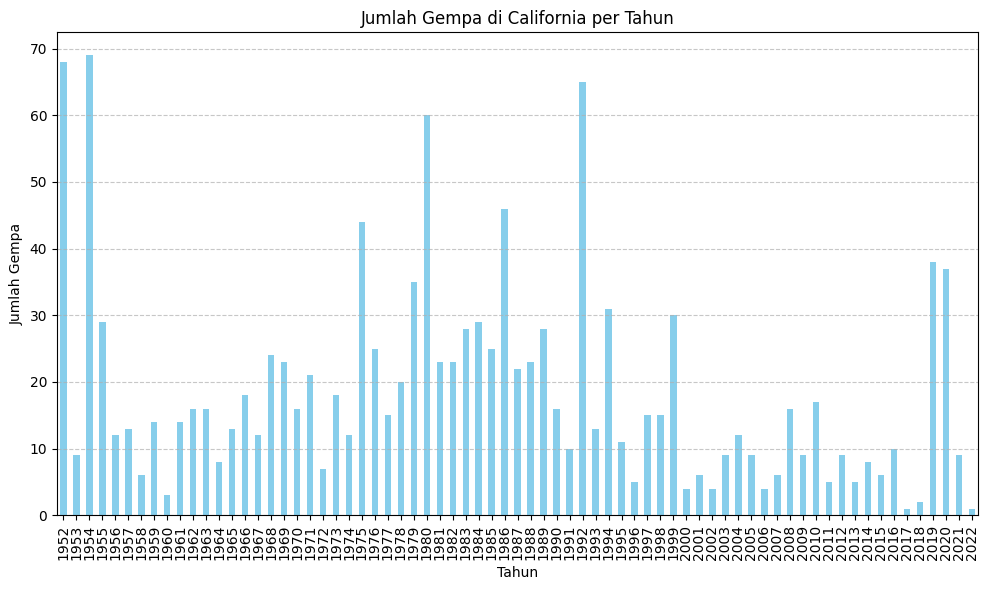

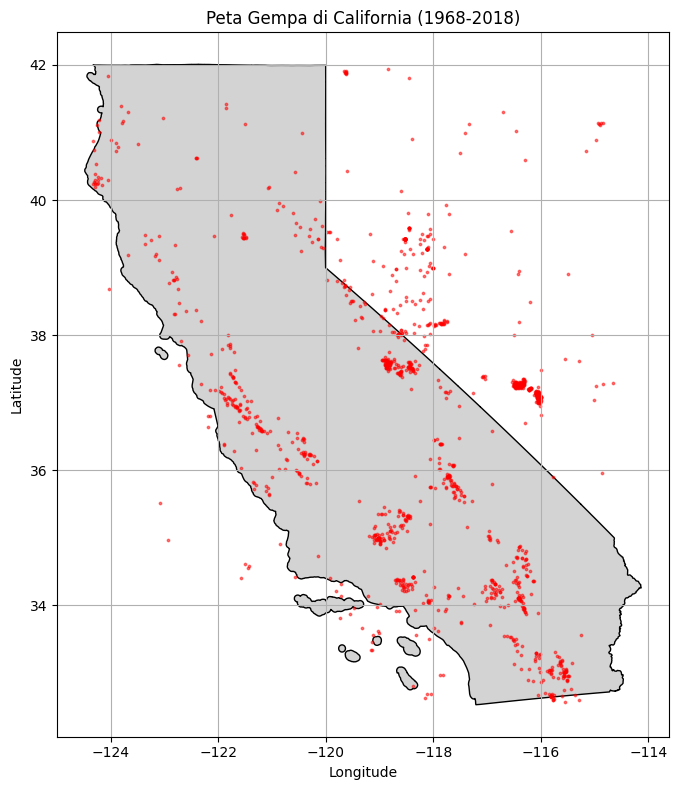

In [68]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Baca data gempa
dataset_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1952_2022.csv"
df = pd.read_csv(dataset_url)

# Baca data GeoJSON untuk county di California
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/united_states_california_administrative_boundaries_province_polygon.shp"
counties = gpd.read_file(geojson_url)

# Preprocessing data
# Ubah kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Buat kolom baru untuk tahun
df['year'] = df['time'].dt.year

# Hitung jumlah gempa per tahun
earthquake_counts = df.groupby('year').size()

# Visualisasi jumlah gempa per tahun
plt.figure(figsize=(10, 6))
earthquake_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Gempa di California per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Gempa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi peta California dengan data gempa
fig, ax = plt.subplots(figsize=(12, 8))
counties.plot(ax=ax, color='lightgrey', edgecolor='k')
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red', alpha=0.5, s=3)
plt.title('Peta Gempa di California (1968-2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


#**Load California Map**

In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Extract city names from the 'place' column
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

# Merge the GeoJSON data with your DataFrame
merged_data = california_map.merge(fixkolom, how='left', left_on='name', right_on='city')
merged_data.head(10)


<ipython-input-70-8c55fdac105d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()


,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,geometry,time,latitude,longitude,place_y,city,depth,mag,magType,year
0,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-119.63630 33.27304, -119.63607 33.2...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-119.75770 33.36296, -119.75767 33.3...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-120.58226 34.10752, -120.57905 34.1...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-118.66796 33.48271, -118.66779 33.4...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-124.48200 40.44032, -124.47916 40.4...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-118.67855 33.02636, -118.67820 33.0...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-119.12356 33.49187, -119.11981 33.4...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,None,None,None,4,None,None,None,None,None,...,"POLYGON ((-123.17383 37.77573, -123.17372 37.7...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**Spatial Autocorrelation**

<ipython-input-62-0d15b145c0c4>:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 8 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7.
  warnings.warn(message)


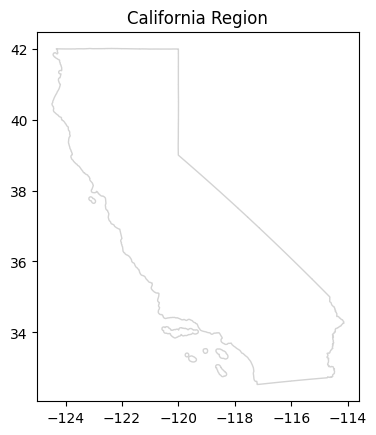

In [62]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(geojson_url)

# Membuat matriks tetangga dengan skema Queen
wq = weights.Queen.from_dataframe(gdf)

# Plot wilayah Anda
gdf.plot(edgecolor='lightgrey', facecolor='none')
plt.title('California Region')

# Plot tetangga (neighbors)
for i in range(len(wq.neighbors)):
    neighbors = wq.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='red')

plt.show()


In [63]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt


# Mendapatkan informasi statistik tentang matriks tetangga
num_regions = wq.n
num_nonzero_links = wq.s0
percentage_nonzero_weights = wq.pct_nonzero
average_num_links = wq.mean_neighbors

# Menampilkan informasi statistik
print("Number of regions:", num_regions)
print("Number of nonzero links:", num_nonzero_links)
print("Percentage nonzero weights:", percentage_nonzero_weights)
print("Average number of links:", average_num_links)

Number of regions: 8
Number of nonzero links: 0.0
Percentage nonzero weights: 0.0
Average number of links: 0.0


<ipython-input-64-05a537f6bcaf>:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 8 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7.
  warnings.warn(message)
<ipython-input-64-05a537f6bcaf>:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq_queen = weights.Queen.from_dataframe(gdf)
<ipython-input-64-05a537f6bcaf>:15: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq_rook = weights.Rook.from_dataframe(gdf)


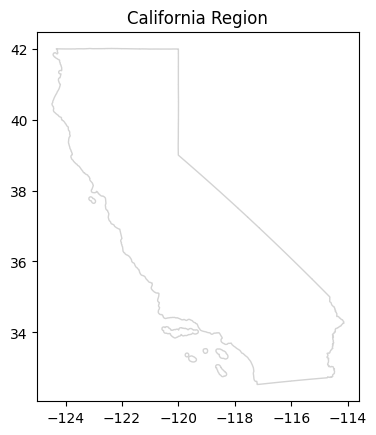

In [64]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(geojson_url)

# Membuat matriks tetangga dengan skema Queen
wq = weights.Queen.from_dataframe(gdf)

# Membuat matriks tetangga dengan skema Queen
wq_queen = weights.Queen.from_dataframe(gdf)

# Membuat matriks tetangga dengan skema Rook
wq_rook = weights.Rook.from_dataframe(gdf)

# Plot wilayah Anda
gdf.plot(edgecolor='lightgrey', facecolor='none')
plt.title('California Region')

# Plot tetangga (neighbors)

# Plot tetangga (neighbors) dengan skema Queen dengan warna merah

for i in range(len(wq_queen.neighbors)):
    neighbors = wq_queen.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='red')

for i in range(len(wq_rook.neighbors)):
    neighbors = wq_rook.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='blue')

plt.show()


In [65]:
print("Number of regions:", wq_queen.n)
print("Number of nonzero links:", wq_queen.s0)
print("Percentage nonzero weights:", wq_queen.pct_nonzero)
print("Average number of links:", wq_queen.mean_neighbors)

Number of regions: 8
Number of nonzero links: 0.0
Percentage nonzero weights: 0.0
Average number of links: 0.0


/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 1.
  self.bins = quantile(y, k=k)


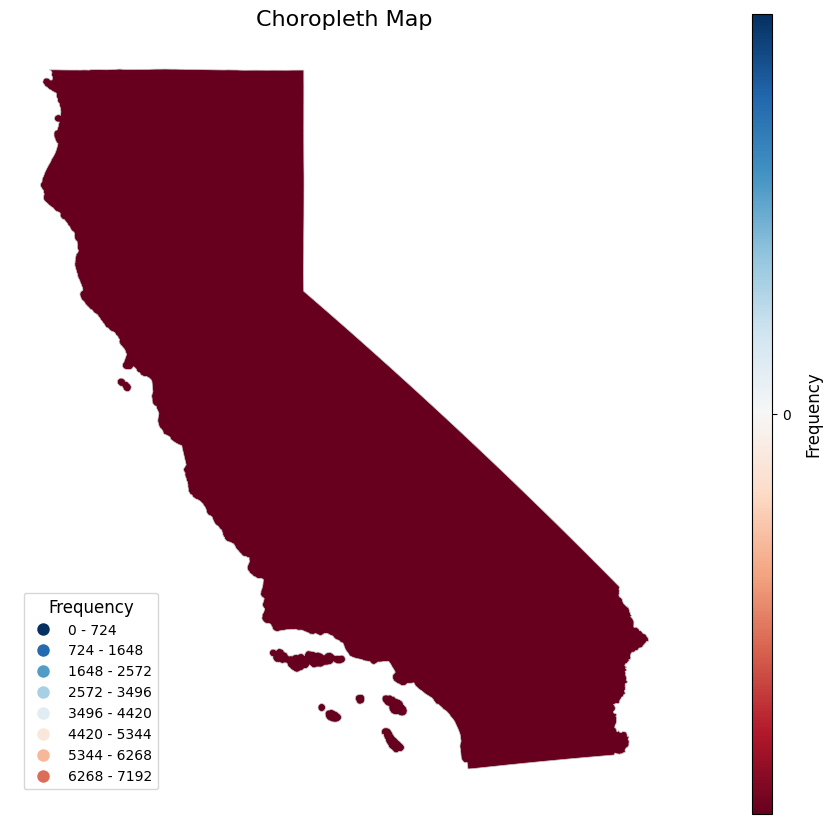

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc
from matplotlib.lines import Line2D

# Memilih kolom 'Freq' dari GeoDataFrame 'districts'
var = districts['Freq']

# Membuat rentang frekuensi sesuai dengan kebutuhan Anda
bins = [0, 724, 1648, 2572, 3496, 4420, 5344, 6268, 7192]

# Menghitung class intervals menggunakan metode Quantiles dengan 10 kelas
q = mc.Quantiles(var, k=10)

# Menggunakan palet warna
my_colours = plt.cm.RdBu(np.linspace(0, 1, 10))[::-1]

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(column='Freq', cmap='RdBu', ax=ax, linewidth=0.5, edgecolor='0.8', legend=False,
               facecolor=[my_colours[q.find_bin(value)] for value in var])

# Meng-custom plot
ax.set_axis_off()
plt.title("Choropleth Map", fontsize=16)

# Menambahkan colorbar vertikal dengan nilai yang lebih detil
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Atur posisi dan ukuran colorbar

# Mengatur batas-batas interval pada colorbar sesuai yang Anda inginkan
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=var.min(), vmax=var.max())),
                  cax=cax, ticks=bins)

cb.set_label('Frequency', fontsize=12, labelpad=10)

# Membuat legenda dengan rentang nilai numerik
legend_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins) - 1)]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=my_colours[i]) for i, label in enumerate(legend_labels)]
legend = ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0.01, 0.01), fontsize=10, title="Frequency")
legend.get_title().set_fontsize(12)

plt.show()